In [4]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, visualize_transition, circuit_drawer
import numpy as np
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

backend = AerSimulator()

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-04-08 21:34:18,486: Default instance: ibm-q/open/main


Estado do qubit: Statevector([-0.38345141+0.91528118j,  0.04767888+0.11380732j],
            dims=(2,))
Vetor de Bloch: x = 0.05, y = 0.11, z = -0.99


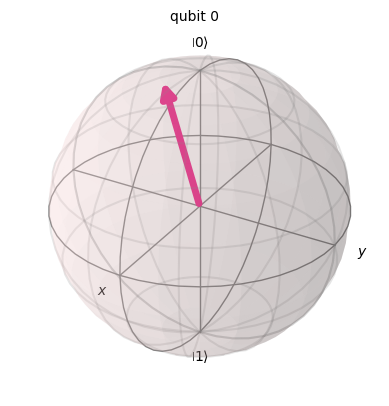

In [8]:
# Gerar ângulos aleatórios
theta = np.random.uniform(0, np.pi)  # Theta varia de 0 a pi
phi = np.random.uniform(0, 2*np.pi)  # Phi varia de 0 a 2pi

# Preparar o circuito quântico com um qubit
qc = QuantumCircuit(1)

# Aplicar as rotações para obter o estado desejado
# A rotação em torno do eixo Y é controlada por theta
# A rotação em torno do eixo Z é controlada por phi
qc.ry(2*theta, 0)  # Rotação em Y de 2*theta
qc.rz(2*phi, 0)    # Rotação em Z de 2*phi
qc.save_statevector()
qc.measure_all()
# Simular o estado final do qubit
job = backend.run(qc)
result = job.result()
vetor = result.get_statevector()

# Imprimir o estado do qubit
print("Estado do qubit:", vetor)

# Calcular e imprimir o vetor de Bloch
# Usamos a representação em coordenadas esféricas para calcular os componentes do vetor
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
print("Vetor de Bloch: x = {:.2f}, y = {:.2f}, z = {:.2f}".format(x, y, z))

# Mostrar o estado na esfera de Bloch
plot_bloch_multivector(vetor)